In [27]:
###Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

In [29]:
###Load Data

df = pd.read_csv('../data/labeled/calibration_merged.csv', index_col=0)
df.columns

Index(['ts_r', 'acc_x_r', 'acc_y_r', 'acc_z_r', 'temp_r', 'gyr_x_r', 'gyr_y_r',
       'gyr_z_r', 'mag_x_r', 'mag_y_r', 'mag_z_r', 'kal_status_r', 'alpha_r',
       'beta_r', 'ts_n', 'acc_x_n', 'acc_y_n', 'acc_z_n', 'temp_n', 'gyr_x_n',
       'gyr_y_n', 'gyr_z_n', 'mag_x_n', 'mag_y_n', 'mag_z_n', 'kal_status_n',
       'alpha_n', 'beta_n', 'started', 'calibrated', 'monitoring', 'zone',
       'in_bending_orange_zone', 'in_bending_red_zone', 'in_overreach_zone',
       'bending_buzzing', 'overreach_buzzing', 'walking', 'vibrating',
       'static_posture', 'label', 'label2'],
      dtype='object')

In [3]:
counter = 1
seconds = 1
sec_list = []

for x in range(len(df)):
    if counter <= 25:
        sec_list.append(seconds)
        counter = counter + 1
    else:
        seconds = seconds + 1
        sec_list.append(seconds)
        counter = 2

df['seconds'] = sec_list

In [4]:
diff_list = []
index = 0

for a in df['alpha_r']:
    diff = a - df.loc[index, 'beta_r']
    diff_list.append(diff)
    index = index + 1

df['ab_r_diff'] = diff_list

In [30]:
df_analysis = df.drop(['ts_r', 'temp_r', 'kal_status_r', 'ts_n', 'temp_n', 'kal_status_n', 'alpha_n', 'beta_n'], axis=1)

df_analysis.columns

Index(['acc_x_r', 'acc_y_r', 'acc_z_r', 'gyr_x_r', 'gyr_y_r', 'gyr_z_r',
       'mag_x_r', 'mag_y_r', 'mag_z_r', 'alpha_r', 'beta_r', 'acc_x_n',
       'acc_y_n', 'acc_z_n', 'gyr_x_n', 'gyr_y_n', 'gyr_z_n', 'mag_x_n',
       'mag_y_n', 'mag_z_n', 'started', 'calibrated', 'monitoring', 'zone',
       'in_bending_orange_zone', 'in_bending_red_zone', 'in_overreach_zone',
       'bending_buzzing', 'overreach_buzzing', 'walking', 'vibrating',
       'static_posture', 'label', 'label2'],
      dtype='object')

In [31]:
df_analysis['label'].unique()

array(['staan', 'buiging', 'overstrekken', 'wearable_afnemen',
       'bolle_rug', 'wearable_aandoen', 'hurken'], dtype=object)

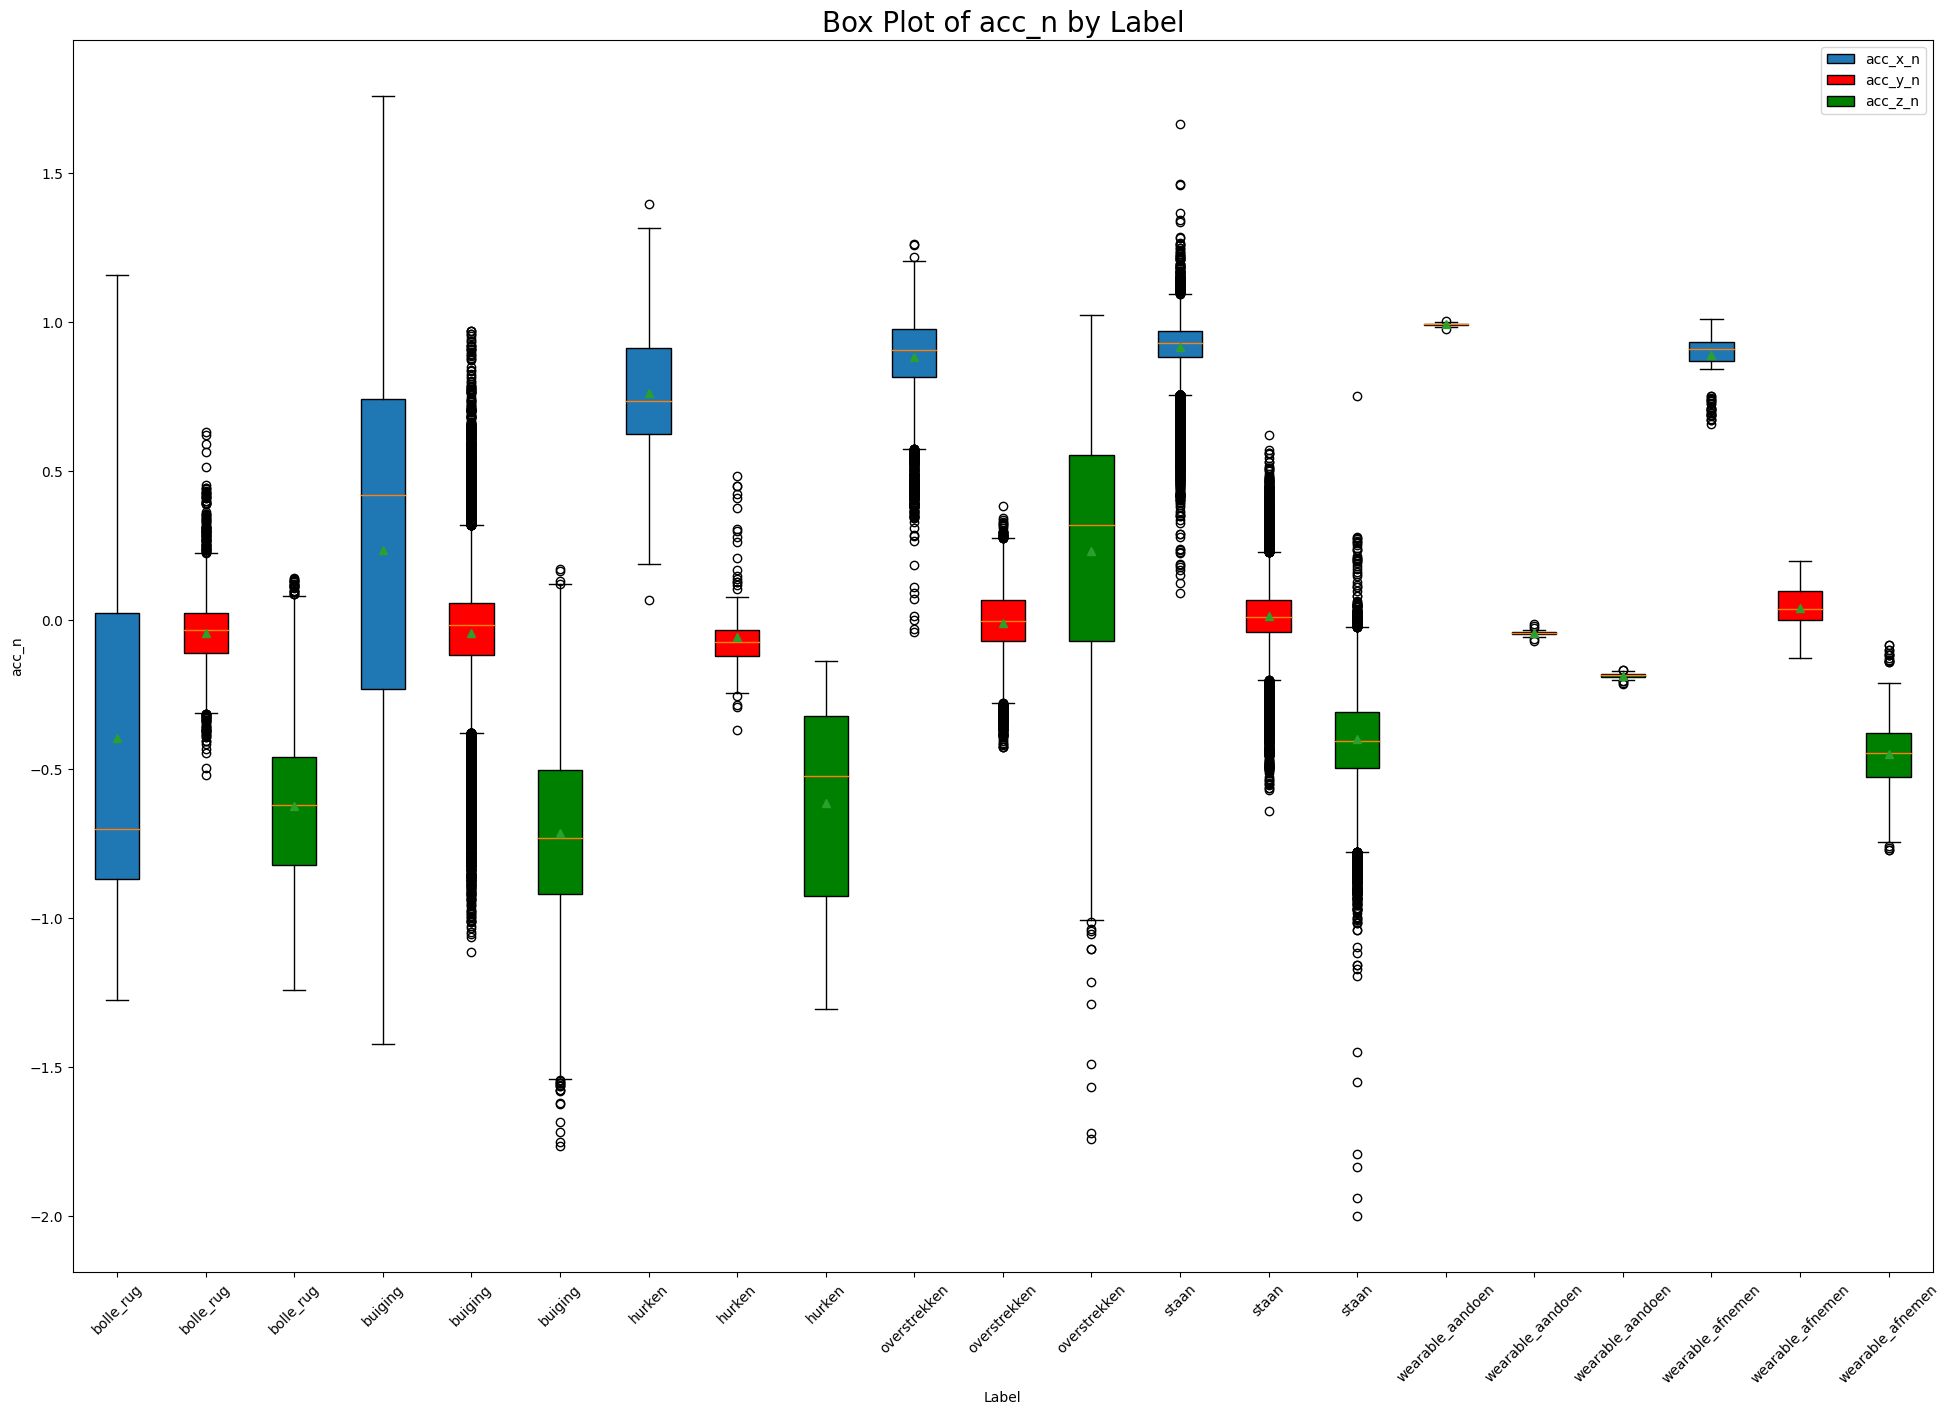

In [33]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_n by Label", fontsize= 20)
ax.set

data = [df_analysis['acc_x_n'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'buiging'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'buiging'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'buiging'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'hurken'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'hurken'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'hurken'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'overstrekken'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'overstrekken'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'overstrekken'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'staan'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'staan'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'staan'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'wearable_afnemen'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'wearable_afnemen'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'wearable_afnemen']]

bp = ax.boxplot(data,
           labels= ['bolle_rug', 'bolle_rug', 'bolle_rug', 'buiging', 'buiging', 'buiging', 'hurken', 'hurken', 'hurken', 
           'overstrekken', 'overstrekken', 'overstrekken', 'staan', 'staan', 'staan', 
           'wearable_aandoen', 'wearable_aandoen', 'wearable_aandoen', 'wearable_afnemen', 'wearable_afnemen', 'wearable_afnemen'],
           showmeans=True, patch_artist=True)
        
bp['boxes'][1].set_facecolor('red')
bp['boxes'][4].set_facecolor('red')
bp['boxes'][7].set_facecolor('red')
bp['boxes'][10].set_facecolor('red')
bp['boxes'][13].set_facecolor('red')
bp['boxes'][16].set_facecolor('red')
bp['boxes'][19].set_facecolor('red')
bp['boxes'][2].set_facecolor('green')
bp['boxes'][5].set_facecolor('green')
bp['boxes'][8].set_facecolor('green')
bp['boxes'][11].set_facecolor('green')
bp['boxes'][14].set_facecolor('green')
bp['boxes'][17].set_facecolor('green')
bp['boxes'][20].set_facecolor('green')

plt.xlabel("Label")
plt.xticks(rotation=45)
plt.ylabel("acc_n")
plt.legend([bp['boxes'][0], bp['boxes'][1], bp['boxes'][2]], ['acc_x_n', 'acc_y_n', 'acc_z_n'])

plt.show()

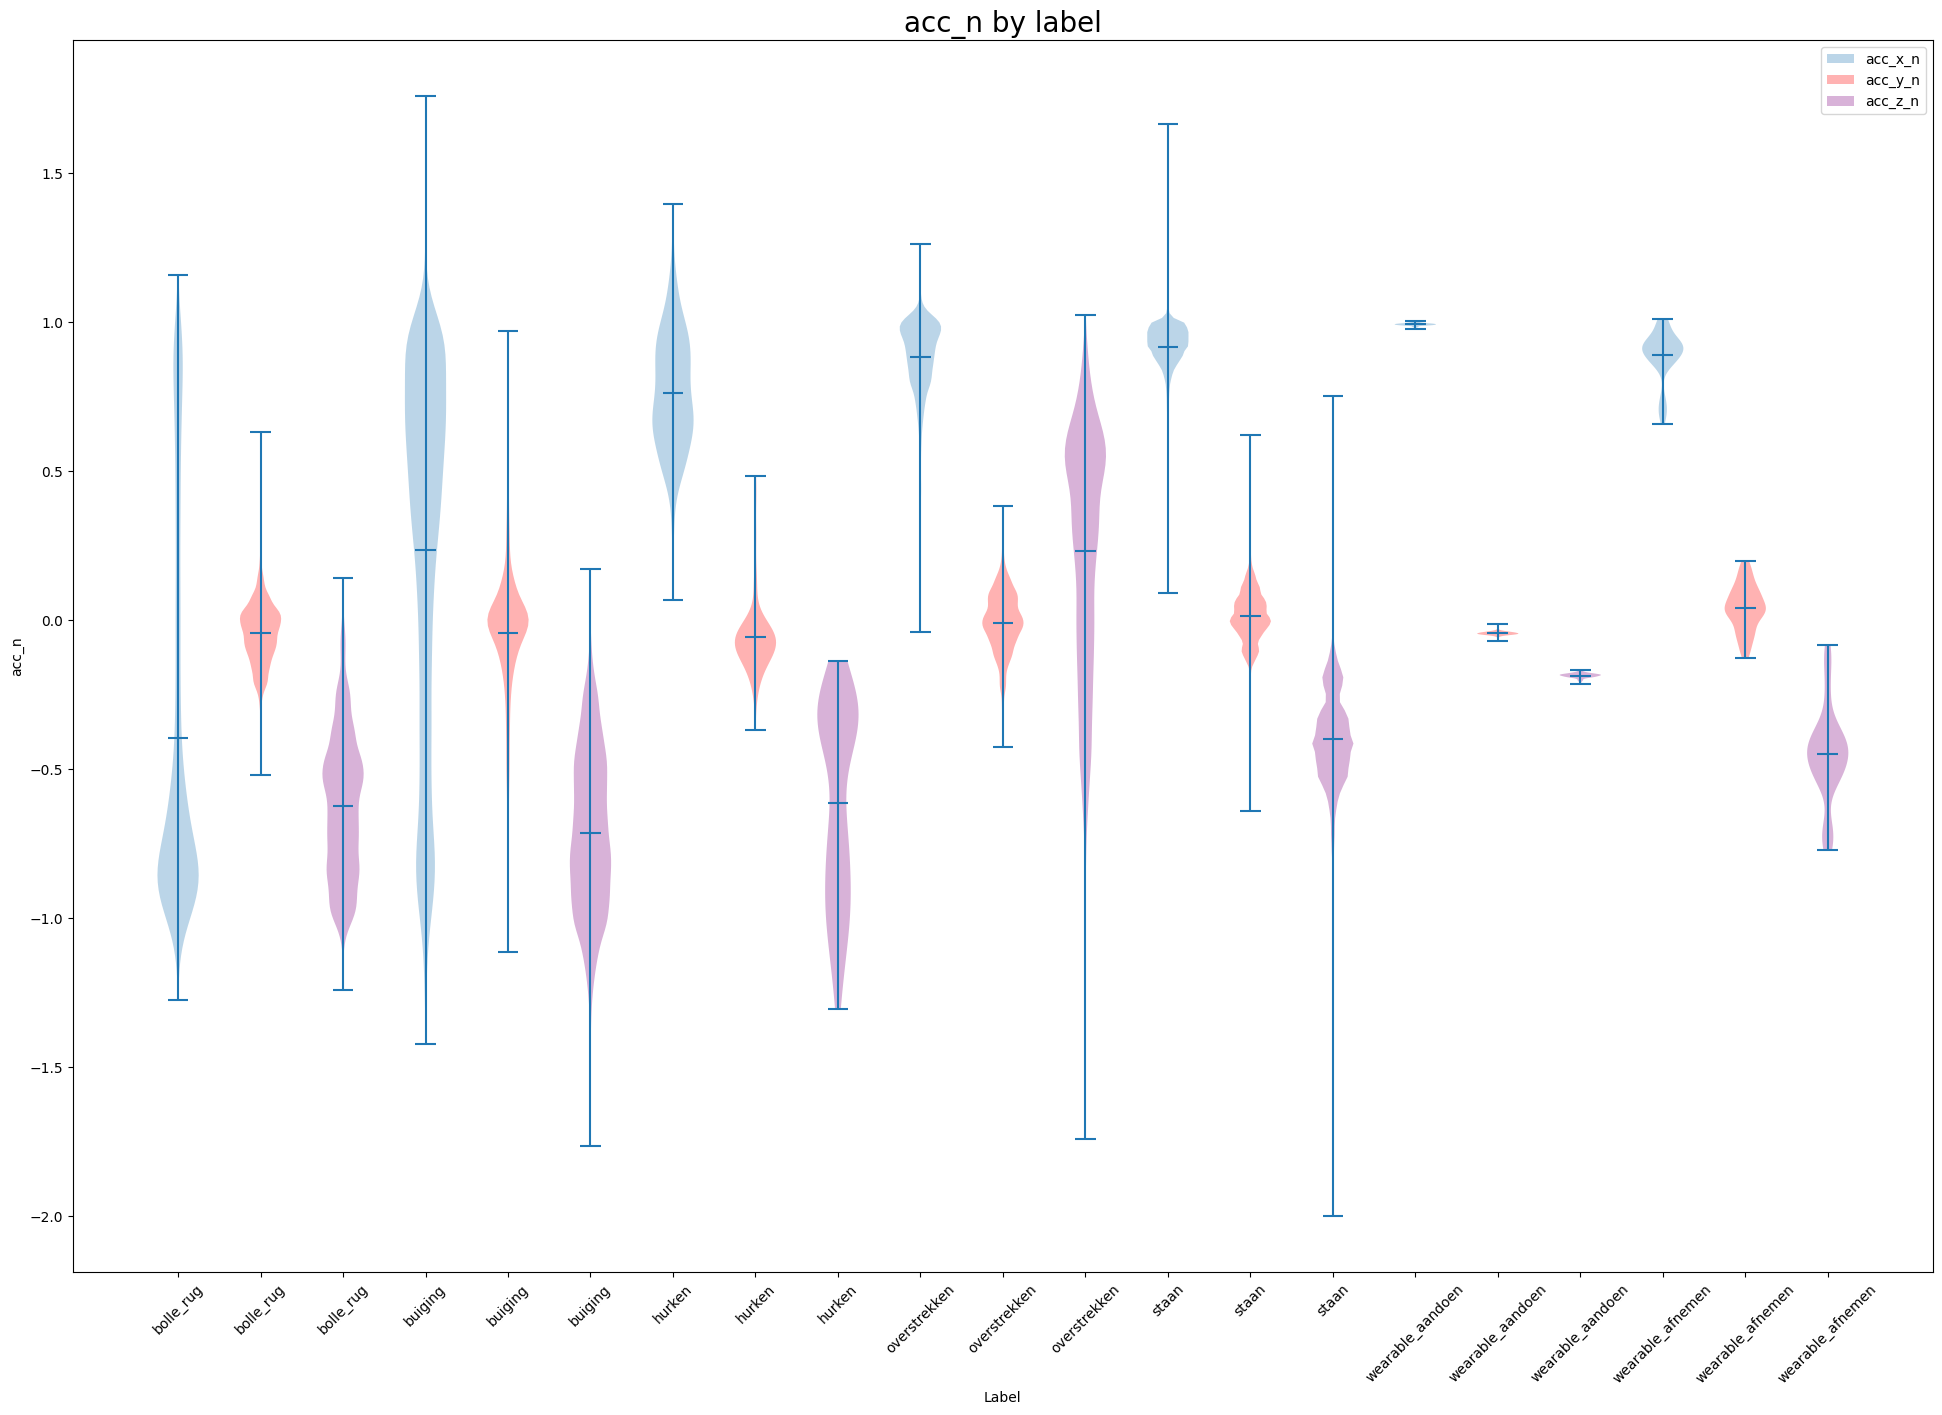

In [36]:
data_to_violin = [df_analysis['acc_x_n'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['acc_y_n'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['acc_z_n'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['acc_x_n'][df_analysis['label'] == 'buiging'],
                df_analysis['acc_y_n'][df_analysis['label'] == 'buiging'],
                df_analysis['acc_z_n'][df_analysis['label'] == 'buiging'],
                df_analysis['acc_x_n'][df_analysis['label'] == 'hurken'],
                df_analysis['acc_y_n'][df_analysis['label'] == 'hurken'],
                df_analysis['acc_z_n'][df_analysis['label'] == 'hurken'],
                df_analysis['acc_x_n'][df_analysis['label'] == 'overstrekken'],
                df_analysis['acc_y_n'][df_analysis['label'] == 'overstrekken'],
                df_analysis['acc_z_n'][df_analysis['label'] == 'overstrekken'],
                df_analysis['acc_x_n'][df_analysis['label'] == 'staan'],
                df_analysis['acc_y_n'][df_analysis['label'] == 'staan'],
                df_analysis['acc_z_n'][df_analysis['label'] == 'staan'],
                df_analysis['acc_x_n'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['acc_y_n'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['acc_z_n'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['acc_x_n'][df_analysis['label'] == 'wearable_afnemen'],
                df_analysis['acc_y_n'][df_analysis['label'] == 'wearable_afnemen'],
                df_analysis['acc_z_n'][df_analysis['label'] == 'wearable_afnemen']]

fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
x_labels = ['bolle_rug', 'bolle_rug', 'bolle_rug', 'buiging', 'buiging', 'buiging', 'hurken', 'hurken', 'hurken', 
            'overstrekken', 'overstrekken', 'overstrekken', 'staan', 'staan', 'staan',
            'wearable_aandoen', 'wearable_aandoen', 'wearable_aandoen', 'wearable_afnemen', 'wearable_afnemen', 'wearable_afnemen']

vp = ax.violinplot(data_to_violin, showmeans=True, showextrema=True)

vp['bodies'][1].set_facecolor('red')
vp['bodies'][4].set_facecolor('red')
vp['bodies'][7].set_facecolor('red')
vp['bodies'][10].set_facecolor('red')
vp['bodies'][13].set_facecolor('red')
vp['bodies'][16].set_facecolor('red')
vp['bodies'][19].set_facecolor('red')
vp['bodies'][2].set_facecolor('purple')
vp['bodies'][5].set_facecolor('purple')
vp['bodies'][8].set_facecolor('purple')
vp['bodies'][11].set_facecolor('purple')
vp['bodies'][14].set_facecolor('purple')
vp['bodies'][17].set_facecolor('purple')
vp['bodies'][20].set_facecolor('purple')

plt.title('acc_n by label', fontsize=20)
plt.xlabel('Label')
plt.ylabel('acc_n')
plt.xticks(x_pos, x_labels, rotation=45)
plt.legend([vp['bodies'][0], vp['bodies'][1], vp['bodies'][2]], ['acc_x_n', 'acc_y_n', 'acc_z_n'])
plt.show()

In [ ]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_x_n by Label", fontsize= 20)
ax.set

data = [df_analysis['acc_x_n'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'buiging'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'overstrekken'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'staan'],
        df_analysis['acc_x_n'][df_analysis['label'] == 'wearable_afnemen']]

ax.boxplot(data,
           labels= ['bolle_rug', 'buiging', 'overstrekken', 'staan', 'wearable_afnemen'],
           showmeans= True)

plt.xlabel("Label")
plt.ylabel("acc_x_n")

plt.show()

In [ ]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_y_n by Label", fontsize= 20)
ax.set

data = [df_analysis['acc_y_n'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'buiging'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'overstrekken'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'staan'],
        df_analysis['acc_y_n'][df_analysis['label'] == 'wearable_afnemen']]

ax.boxplot(data,
           labels= ['bolle_rug', 'buiging', 'overstrekken', 'staan', 'wearable_afnemen'],
           showmeans= True)

plt.xlabel("Label")
plt.ylabel("acc_y_n")

plt.show()

In [ ]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_z_n by Label", fontsize= 20)
ax.set

data = [df_analysis['acc_z_n'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'buiging'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'overstrekken'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'staan'],
        df_analysis['acc_z_n'][df_analysis['label'] == 'wearable_afnemen']]

ax.boxplot(data,
           labels= ['bolle_rug', 'buiging', 'overstrekken', 'staan', 'wearable_afnemen'],
           showmeans= True)

plt.xlabel("Label")
plt.ylabel("acc_z_n")

plt.show()

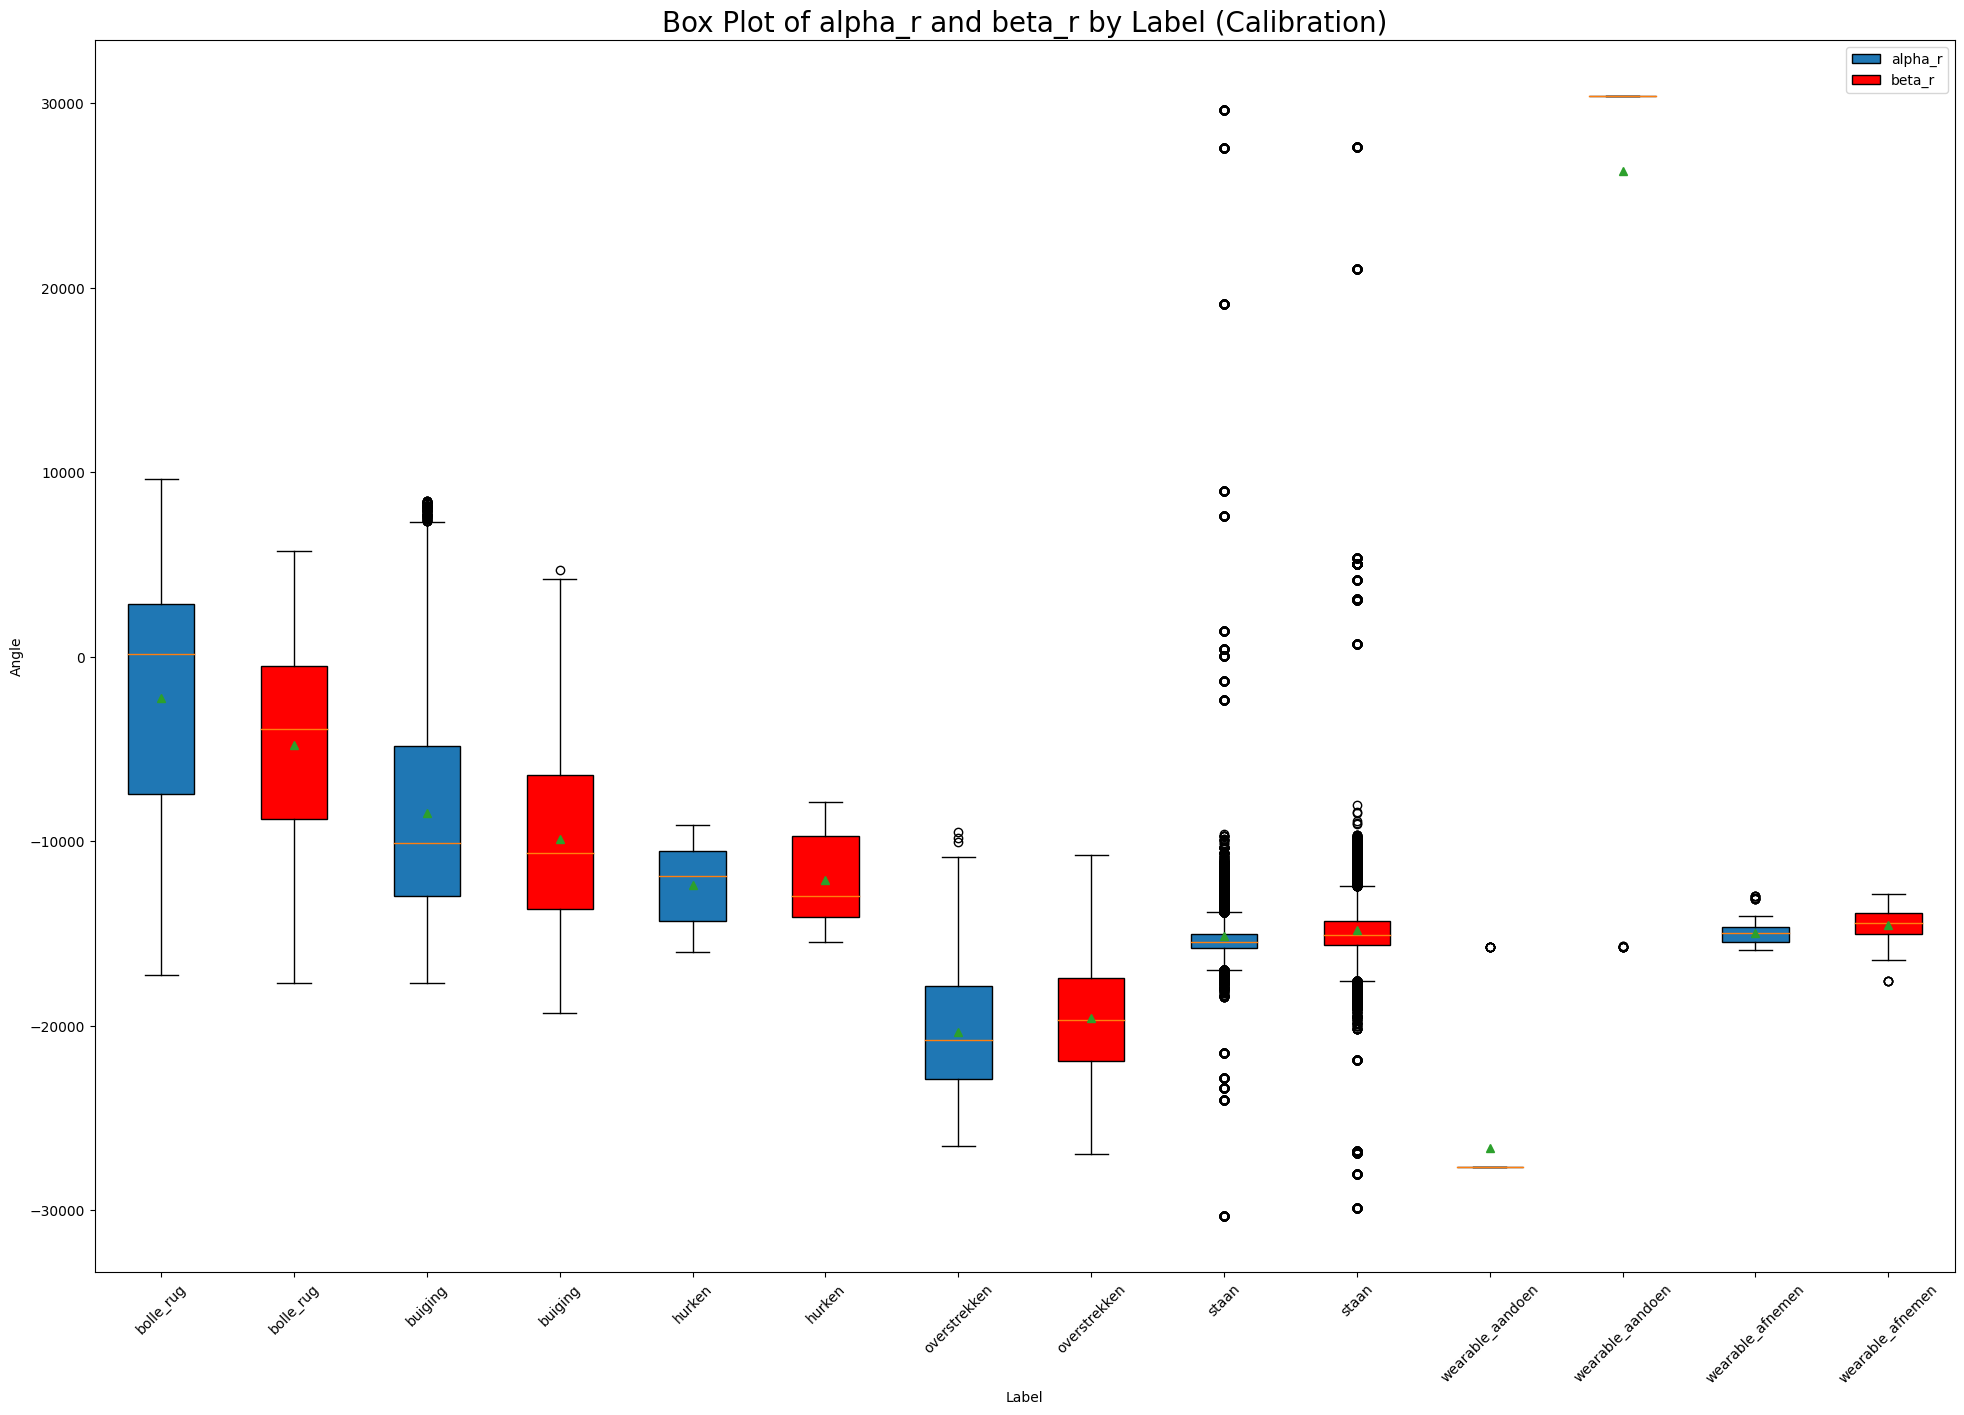

In [40]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of alpha_r and beta_r by Label (Calibration)", fontsize= 20)
ax.set

data = [df_analysis['alpha_r'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['beta_r'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
        df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
        df_analysis['alpha_r'][df_analysis['label'] == 'hurken'],
        df_analysis['beta_r'][df_analysis['label'] == 'hurken'],
        df_analysis['alpha_r'][df_analysis['label'] == 'overstrekken'],
        df_analysis['beta_r'][df_analysis['label'] == 'overstrekken'],
        df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
        df_analysis['beta_r'][df_analysis['label'] == 'staan'],
        df_analysis['alpha_r'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['beta_r'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['alpha_r'][df_analysis['label'] == 'wearable_afnemen'],
        df_analysis['beta_r'][df_analysis['label'] == 'wearable_afnemen']]

bp = ax.boxplot(data,
           labels= ['bolle_rug', 'bolle_rug', 'buiging', 'buiging', 'hurken', 'hurken', 'overstrekken', 'overstrekken', 'staan', 'staan', 
           'wearable_aandoen', 'wearable_aandoen', 'wearable_afnemen', 'wearable_afnemen'],
           showmeans= True, patch_artist=True)

bp['boxes'][1].set_facecolor('red')
bp['boxes'][3].set_facecolor('red')
bp['boxes'][5].set_facecolor('red')
bp['boxes'][7].set_facecolor('red')
bp['boxes'][9].set_facecolor('red')
bp['boxes'][11].set_facecolor('red')
bp['boxes'][13].set_facecolor('red')

plt.xlabel("Label")
plt.xticks(rotation=45)
plt.ylabel("Angle")
plt.legend([bp['boxes'][0], bp['boxes'][1]], ['alpha_r', 'beta_r'])

plt.show()

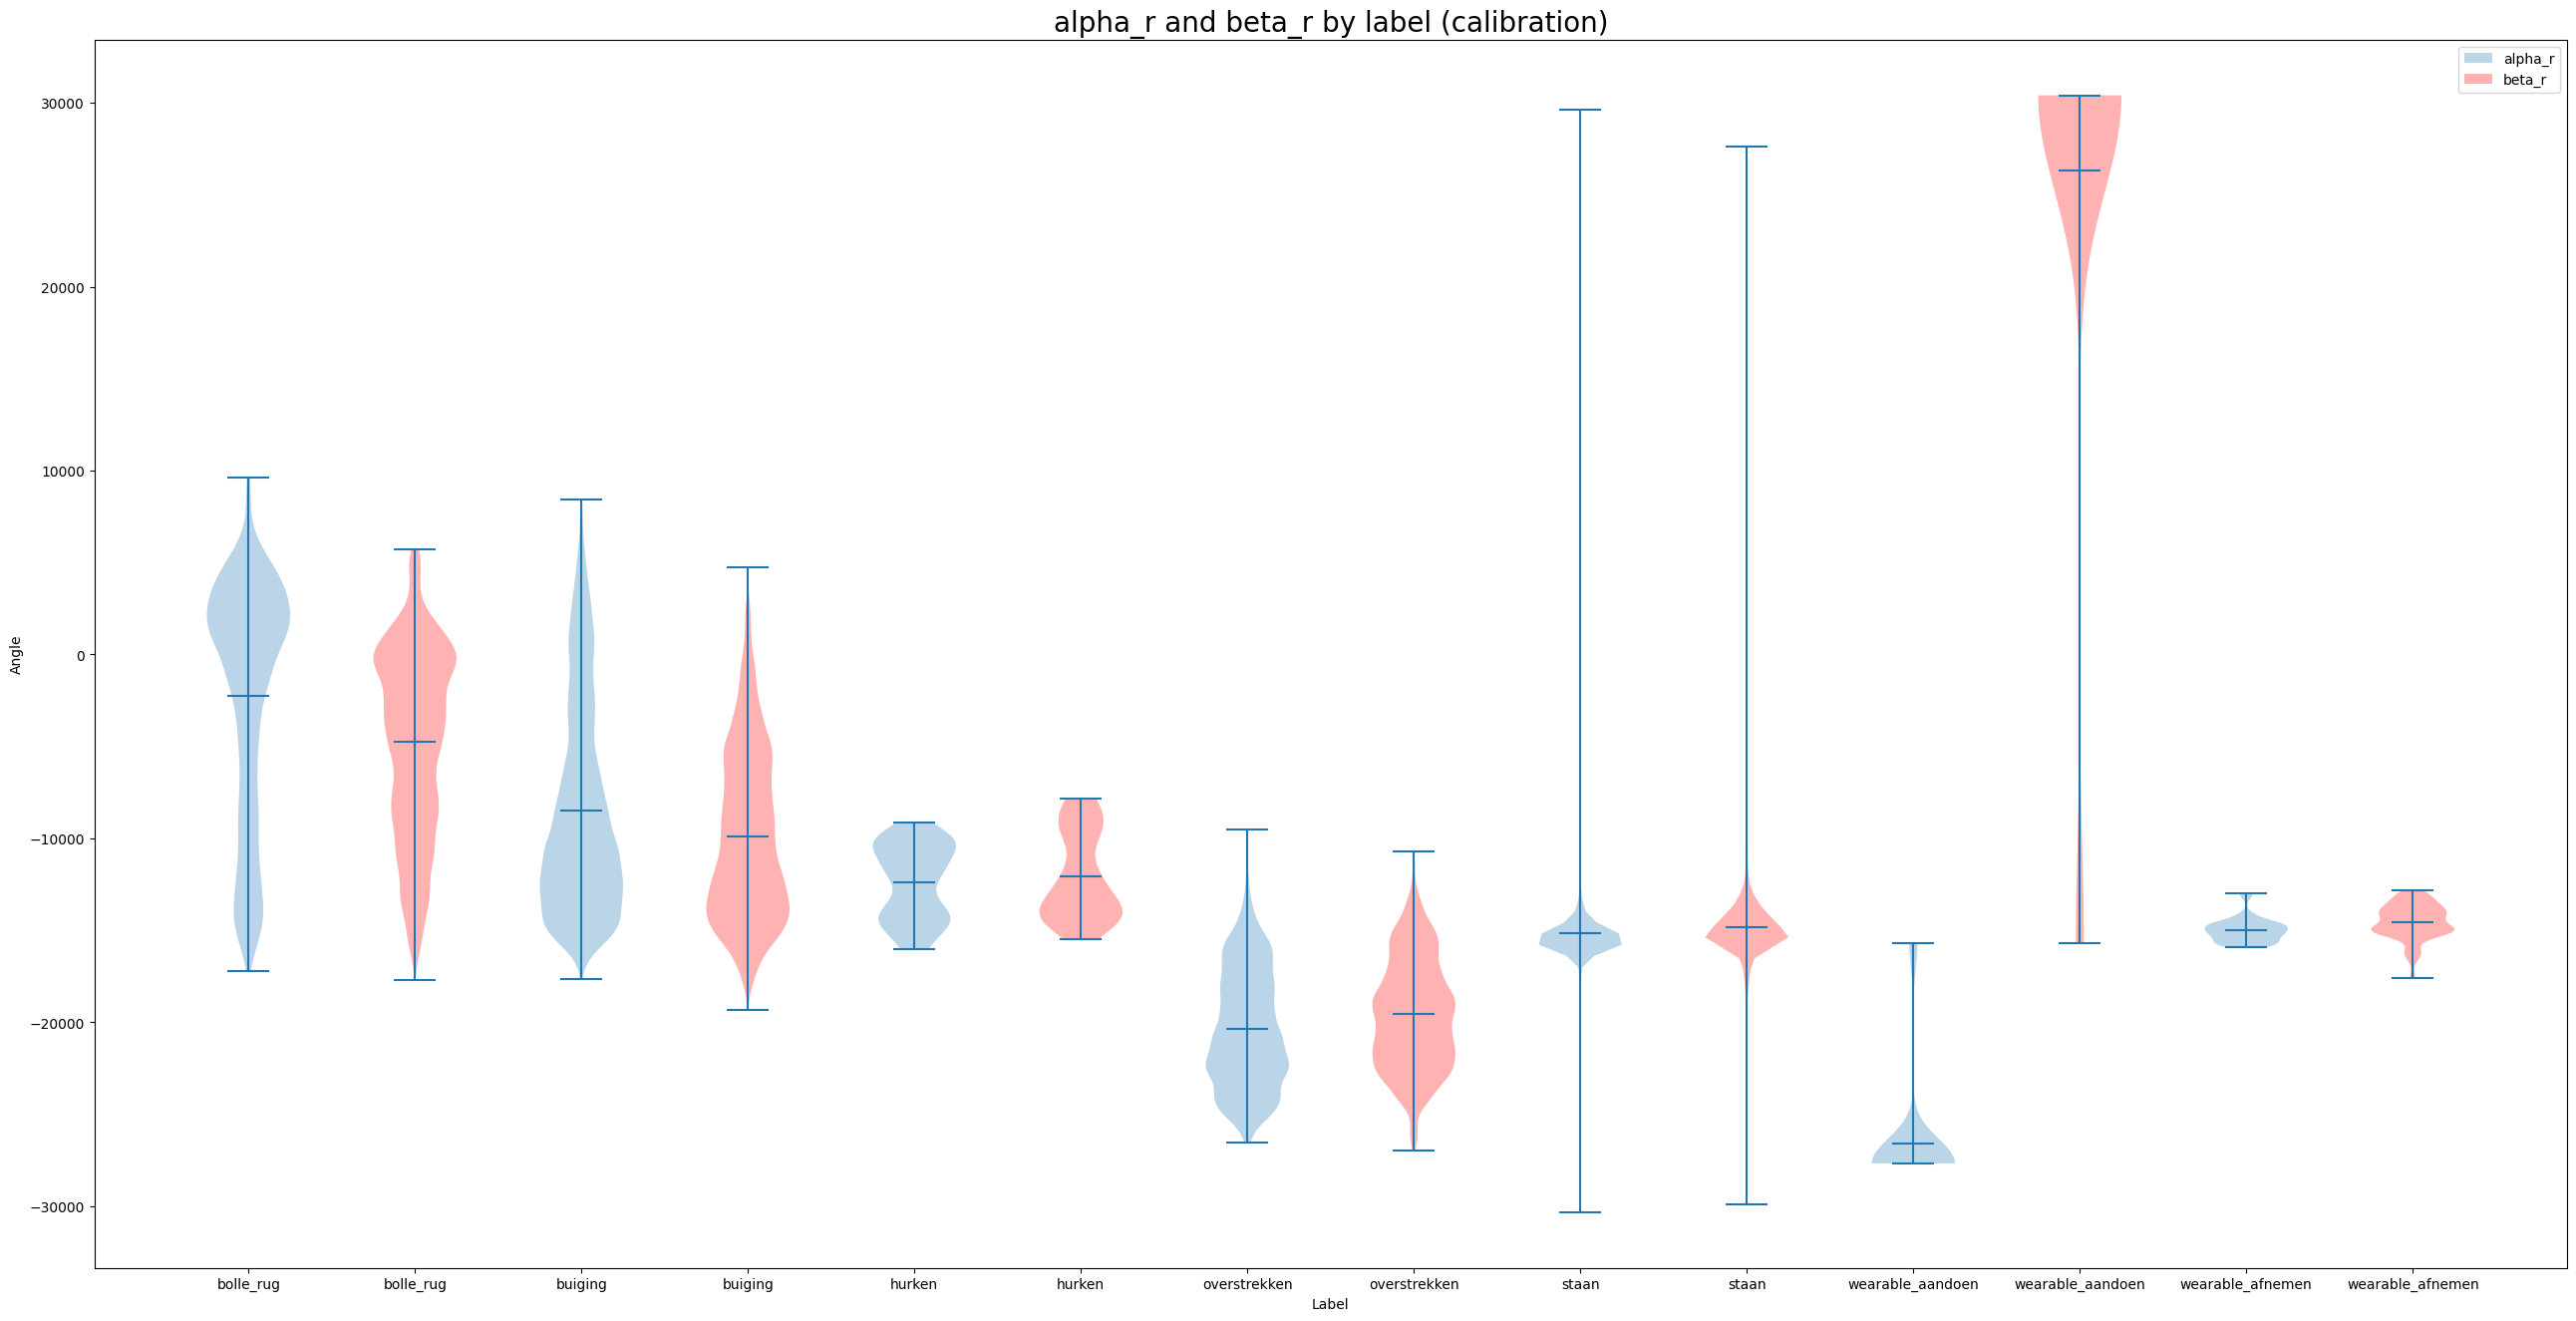

In [41]:
data_to_violin = [df_analysis['alpha_r'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['beta_r'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
                df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
                df_analysis['alpha_r'][df_analysis['label'] == 'hurken'],
                df_analysis['beta_r'][df_analysis['label'] == 'hurken'],
                df_analysis['alpha_r'][df_analysis['label'] == 'overstrekken'],
                df_analysis['beta_r'][df_analysis['label'] == 'overstrekken'],
                df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
                df_analysis['beta_r'][df_analysis['label'] == 'staan'],
                df_analysis['alpha_r'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['beta_r'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['alpha_r'][df_analysis['label'] == 'wearable_afnemen'],
                df_analysis['beta_r'][df_analysis['label'] == 'wearable_afnemen']]

fig = plt.figure(figsize=(32, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
x_labels = ['bolle_rug', 'bolle_rug', 'buiging', 'buiging', 'hurken', 'hurken', 'overstrekken', 'overstrekken', 'staan', 'staan', 
            'wearable_aandoen', 'wearable_aandoen', 'wearable_afnemen', 'wearable_afnemen']

vp = ax.violinplot(data_to_violin, showmeans=True, showextrema=True)

vp['bodies'][1].set_facecolor('red')
vp['bodies'][3].set_facecolor('red')
vp['bodies'][5].set_facecolor('red')
vp['bodies'][7].set_facecolor('red')
vp['bodies'][9].set_facecolor('red')
vp['bodies'][11].set_facecolor('red')
vp['bodies'][13].set_facecolor('red')

plt.title('alpha_r and beta_r by label (calibration)', fontsize=20)
plt.xlabel('Label')
plt.ylabel('Angle')
plt.xticks(x_pos, x_labels)
plt.legend([vp['bodies'][0], vp['bodies'][1]], ['alpha_r', 'beta_r'])
plt.show()

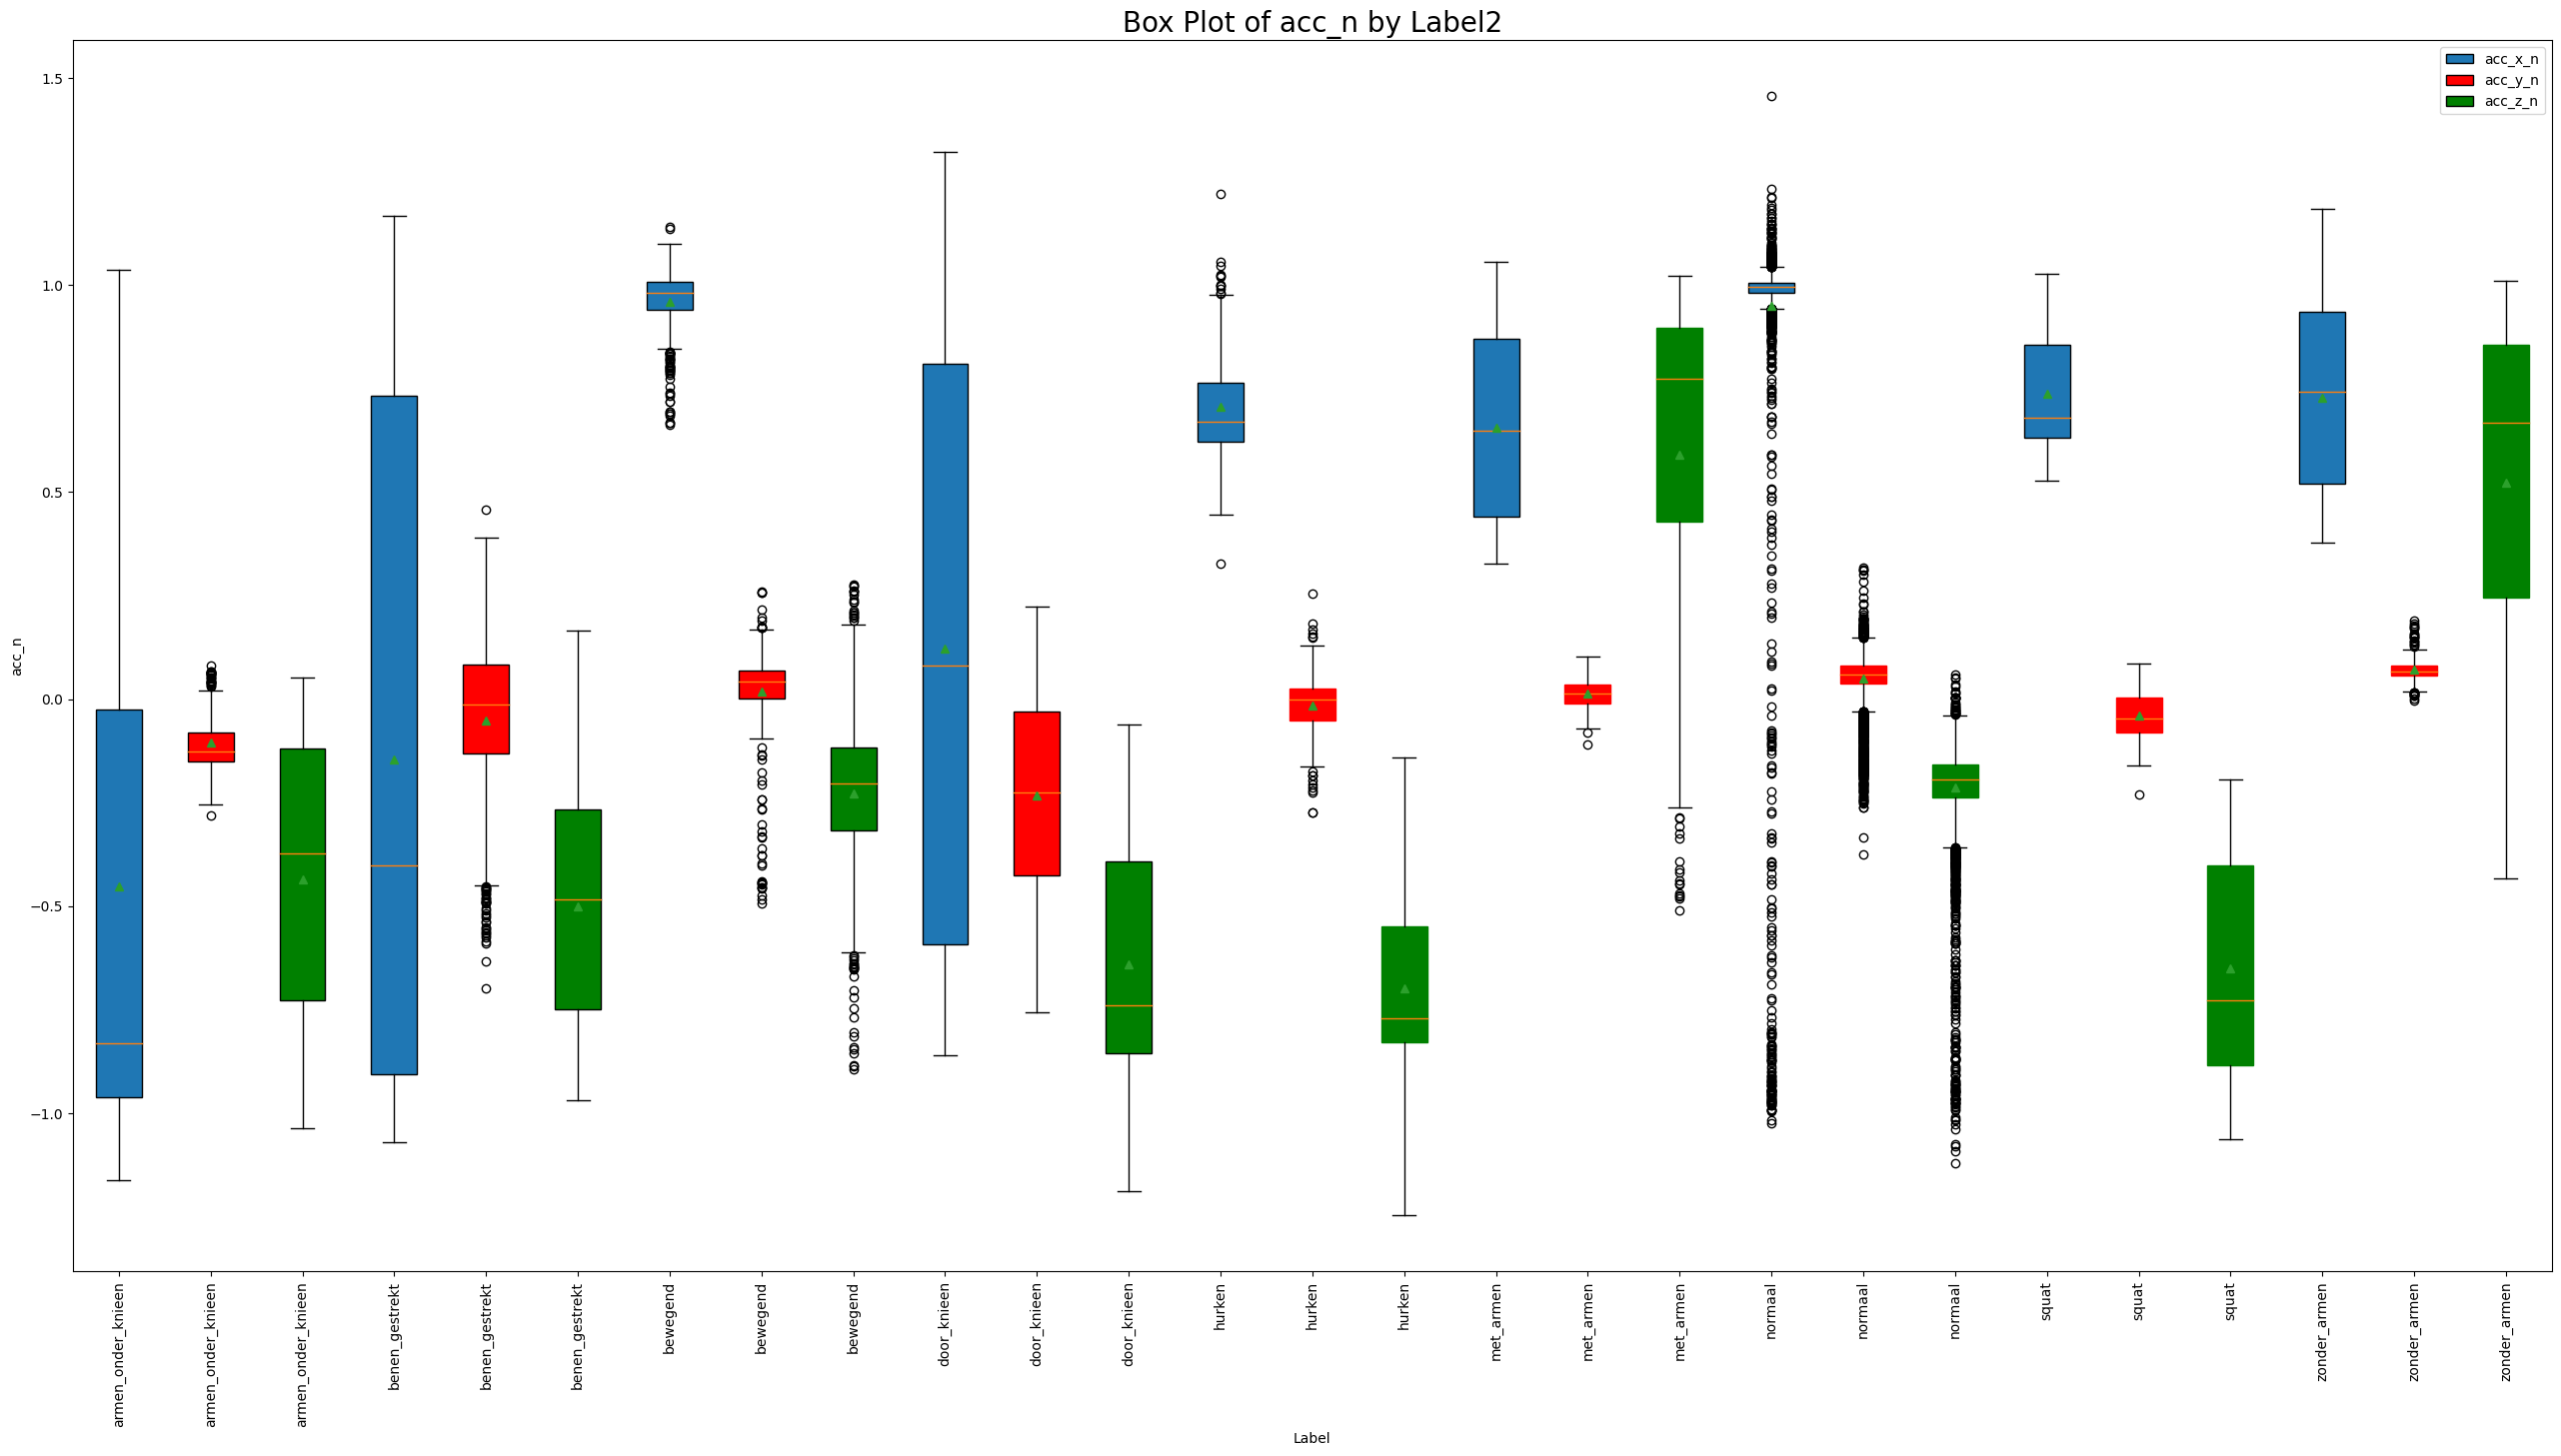

In [24]:
fig = plt.figure(figsize= (32, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_n by Label2", fontsize= 20)
ax.set

data = [df_analysis['acc_x_n'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'bewegend'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'bewegend'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'bewegend'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'hurken'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'hurken'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'hurken'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'met_armen'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'met_armen'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'met_armen'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'normaal'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'normaal'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'normaal'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'squat'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'squat'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'squat'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'zonder_armen'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'zonder_armen'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'zonder_armen']]

bp = ax.boxplot(data,
           labels= ['armen_onder_knieen', 'armen_onder_knieen', 'armen_onder_knieen', 'benen_gestrekt', 'benen_gestrekt', 'benen_gestrekt', 
           'bewegend', 'bewegend', 'bewegend', 'door_knieen', 'door_knieen', 'door_knieen', 'hurken', 'hurken', 'hurken', 
           'met_armen', 'met_armen', 'met_armen', 'normaal', 'normaal', 'normaal', 'squat', 'squat', 'squat', 
           'zonder_armen', 'zonder_armen', 'zonder_armen'],
           showmeans= True, patch_artist=True)

bp['boxes'][1].set_facecolor('red')
bp['boxes'][4].set_facecolor('red')
bp['boxes'][7].set_facecolor('red')
bp['boxes'][10].set_facecolor('red')
bp['boxes'][13].set_color('red')
bp['boxes'][16].set_color('red')
bp['boxes'][19].set_color('red')
bp['boxes'][22].set_color('red')
bp['boxes'][25].set_color('red')
bp['boxes'][2].set_facecolor('green')
bp['boxes'][5].set_facecolor('green')
bp['boxes'][8].set_facecolor('green')
bp['boxes'][11].set_facecolor('green')
bp['boxes'][14].set_color('green')
bp['boxes'][17].set_color('green')
bp['boxes'][20].set_color('green')
bp['boxes'][23].set_color('green')
bp['boxes'][26].set_color('green')

plt.xlabel("Label")
plt.xticks(rotation=90)
plt.ylabel("acc_n")
plt.legend([bp['boxes'][0], bp['boxes'][1], bp['boxes'][2]], ['acc_x_n', 'acc_y_n', 'acc_z_n'])

plt.show()

In [ ]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_x_n by Label2", fontsize= 20)
ax.set

data = [df_analysis['acc_x_n'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'bewegend'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'hurken'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'met_armen'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'normaal'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'squat'],
        df_analysis['acc_x_n'][df_analysis['label2'] == 'zonder_armen']]

ax.boxplot(data,
           labels= ['armen_onder_knieen', 'benen_gestrekt', 'bewegend', 'door_knieen', 'hurken', 'met_armen', 'normaal', 'squat', 
           'zonder_armen'],
           showmeans= True)

plt.xlabel("Label")
plt.ylabel("acc_x_n")

plt.show()

In [ ]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_y_n by Label2", fontsize= 20)
ax.set

data = [df_analysis['acc_y_n'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'bewegend'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'hurken'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'met_armen'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'normaal'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'squat'],
        df_analysis['acc_y_n'][df_analysis['label2'] == 'zonder_armen']]

ax.boxplot(data,
           labels= ['armen_onder_knieen', 'benen_gestrekt', 'bewegend', 'door_knieen', 'hurken', 'met_armen', 'normaal', 'squat', 
           'zonder_armen'],
           showmeans= True)

plt.xlabel("Label")
plt.ylabel("acc_y_n")

plt.show()

In [ ]:
fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of acc_z_n by Label2", fontsize= 20)
ax.set

data = [df_analysis['acc_z_n'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'bewegend'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'hurken'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'met_armen'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'normaal'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'squat'],
        df_analysis['acc_z_n'][df_analysis['label2'] == 'zonder_armen']]

ax.boxplot(data,
           labels= ['armen_onder_knieen', 'benen_gestrekt', 'bewegend', 'door_knieen', 'hurken', 'met_armen', 'normaal', 'squat', 
           'zonder_armen'],
           showmeans= True)

plt.xlabel("Label")
plt.ylabel("acc_z_n")

plt.show()

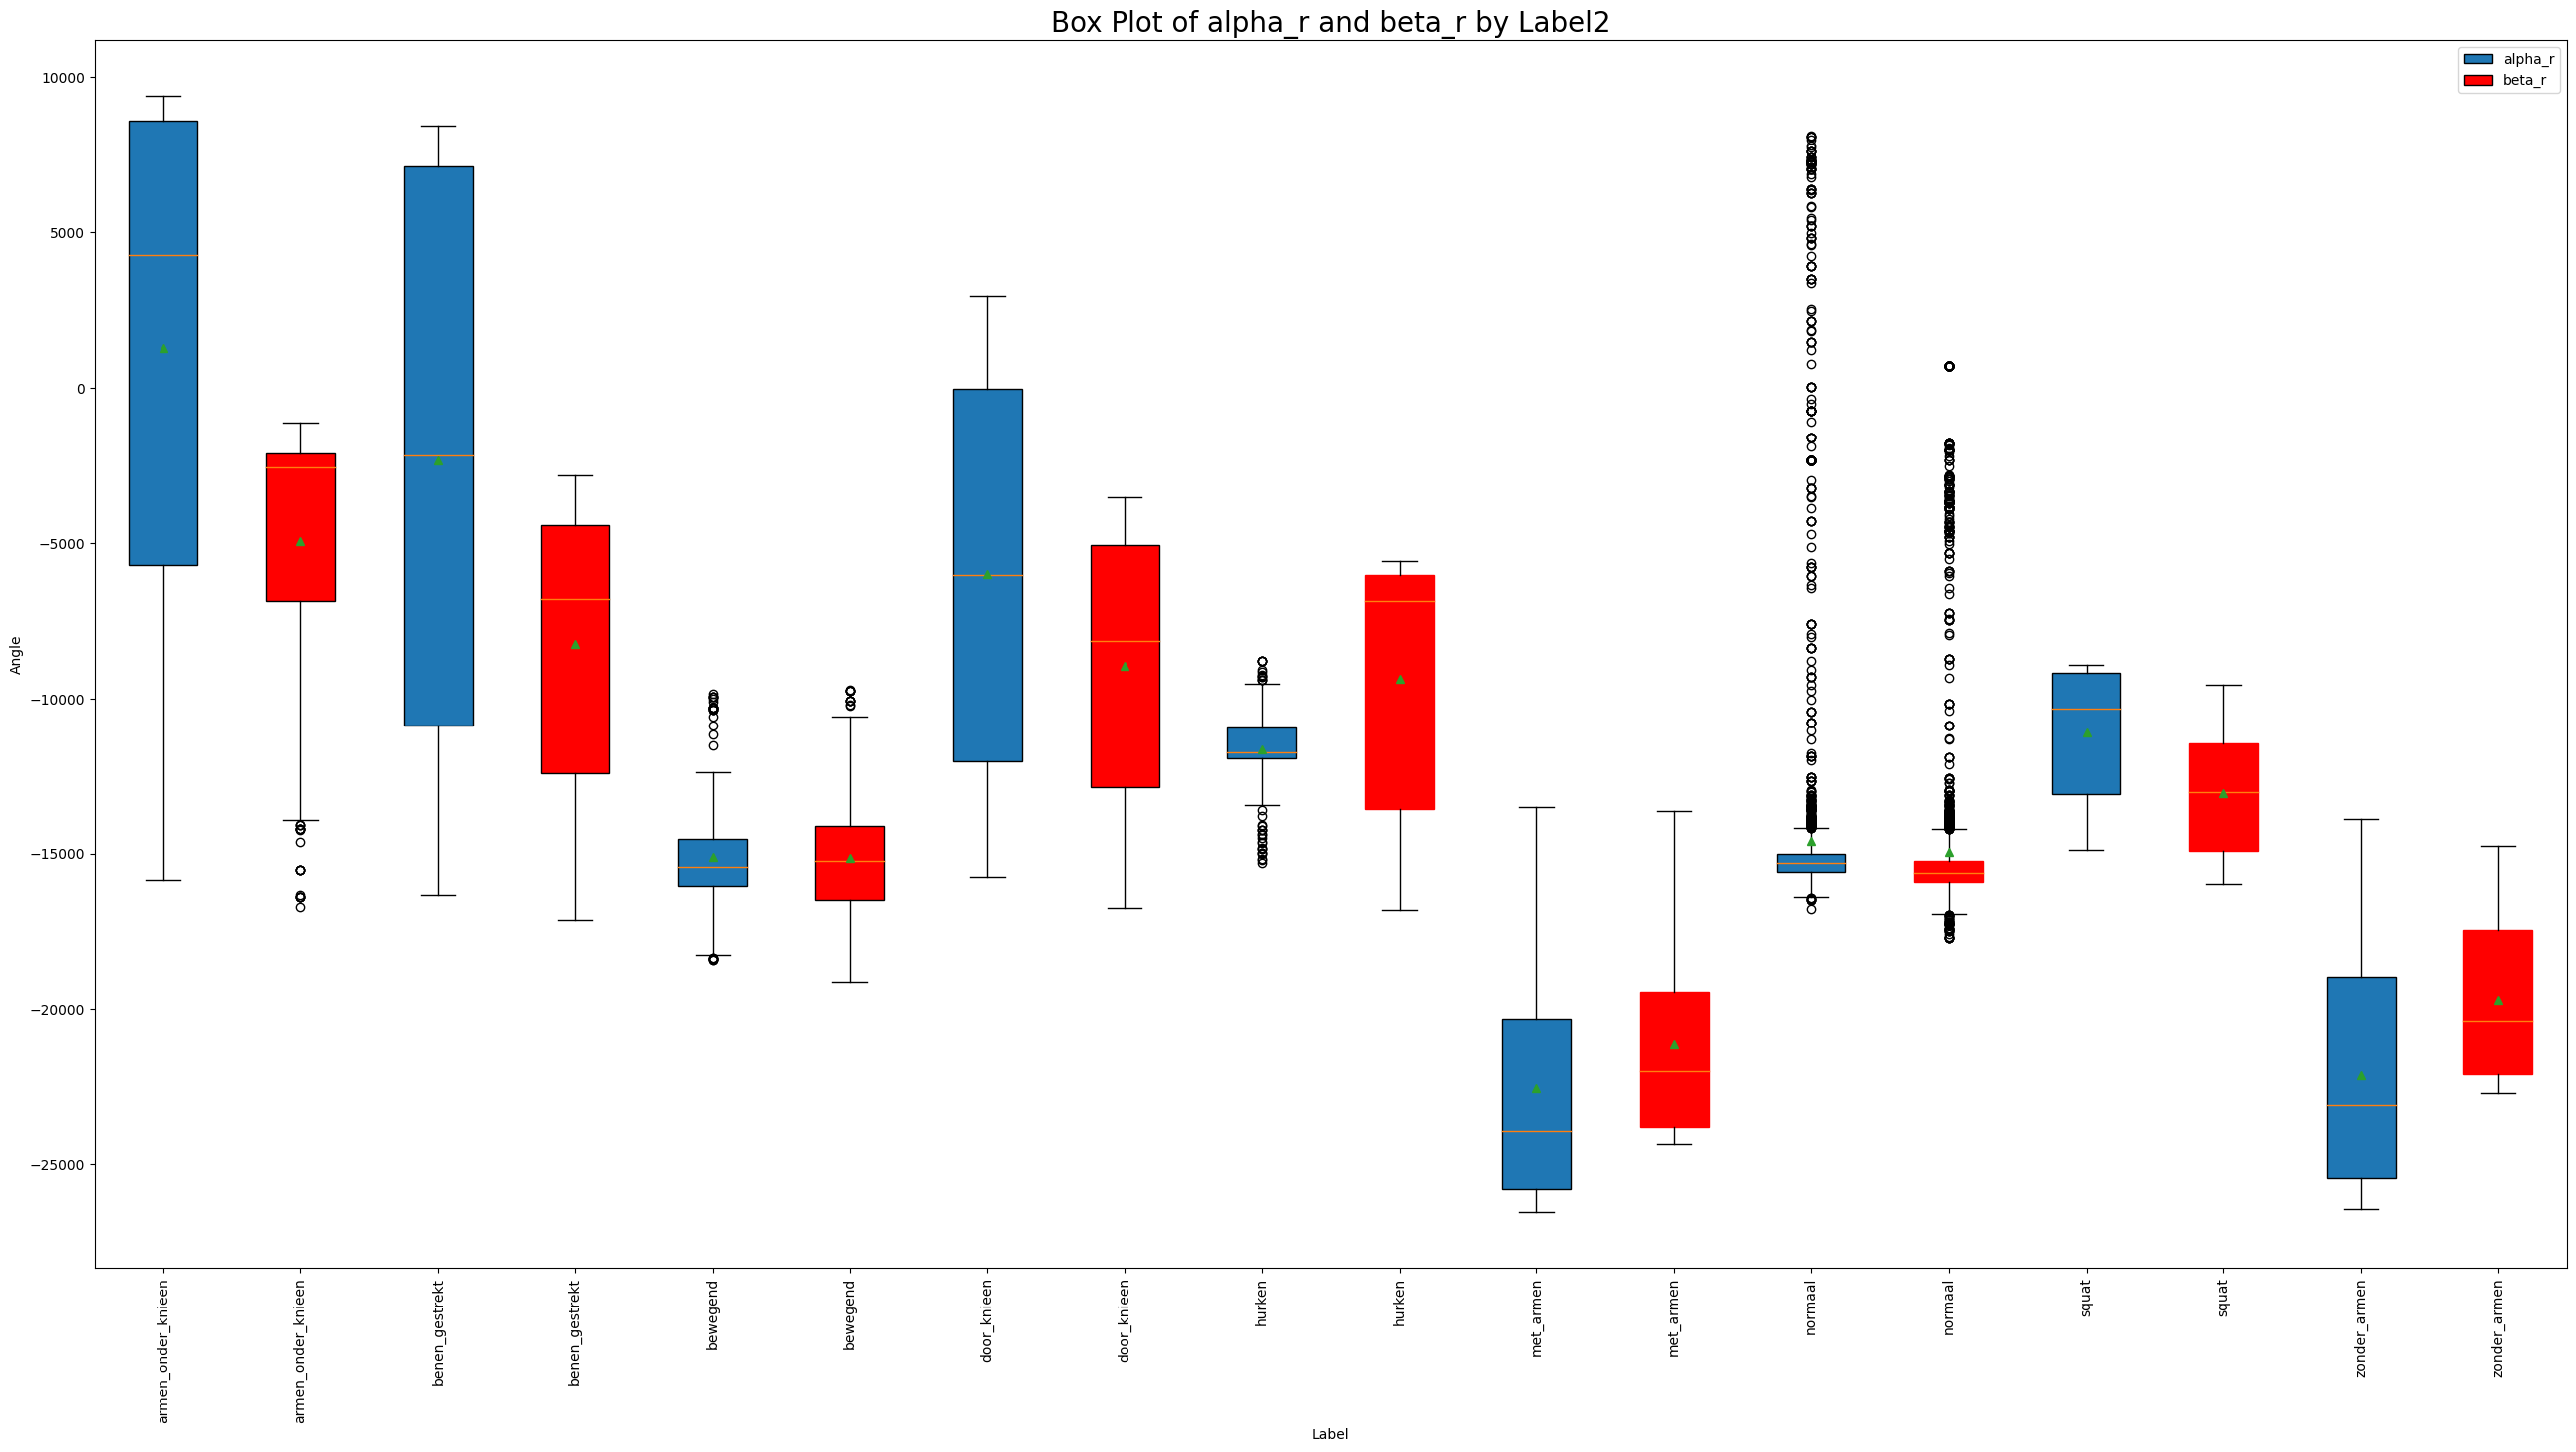

In [26]:
fig = plt.figure(figsize= (32, 16))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of alpha_r and beta_r by Label2", fontsize= 20)
ax.set

data = [df_analysis['alpha_r'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['beta_r'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'bewegend'],
        df_analysis['beta_r'][df_analysis['label2'] == 'bewegend'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'hurken'],
        df_analysis['beta_r'][df_analysis['label2'] == 'hurken'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'met_armen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'met_armen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'normaal'],
        df_analysis['beta_r'][df_analysis['label2'] == 'normaal'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'squat'],
        df_analysis['beta_r'][df_analysis['label2'] == 'squat'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'zonder_armen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'zonder_armen']]

bp = ax.boxplot(data,
           labels= ['armen_onder_knieen', 'armen_onder_knieen', 'benen_gestrekt', 'benen_gestrekt', 'bewegend', 'bewegend', 
           'door_knieen', 'door_knieen', 'hurken', 'hurken', 'met_armen', 'met_armen', 'normaal', 'normaal', 'squat', 'squat', 
           'zonder_armen', 'zonder_armen'],
           showmeans= True, patch_artist=True)

bp['boxes'][1].set_facecolor('red')
bp['boxes'][3].set_facecolor('red')
bp['boxes'][5].set_facecolor('red')
bp['boxes'][7].set_facecolor('red')
bp['boxes'][9].set_color('red')
bp['boxes'][11].set_color('red')
bp['boxes'][13].set_color('red')
bp['boxes'][15].set_color('red')
bp['boxes'][17].set_color('red')

plt.xlabel("Label")
plt.xticks(rotation=90)
plt.ylabel("Angle")
plt.legend([bp['boxes'][0], bp['boxes'][1]], ['alpha_r', 'beta_r'])

plt.show()

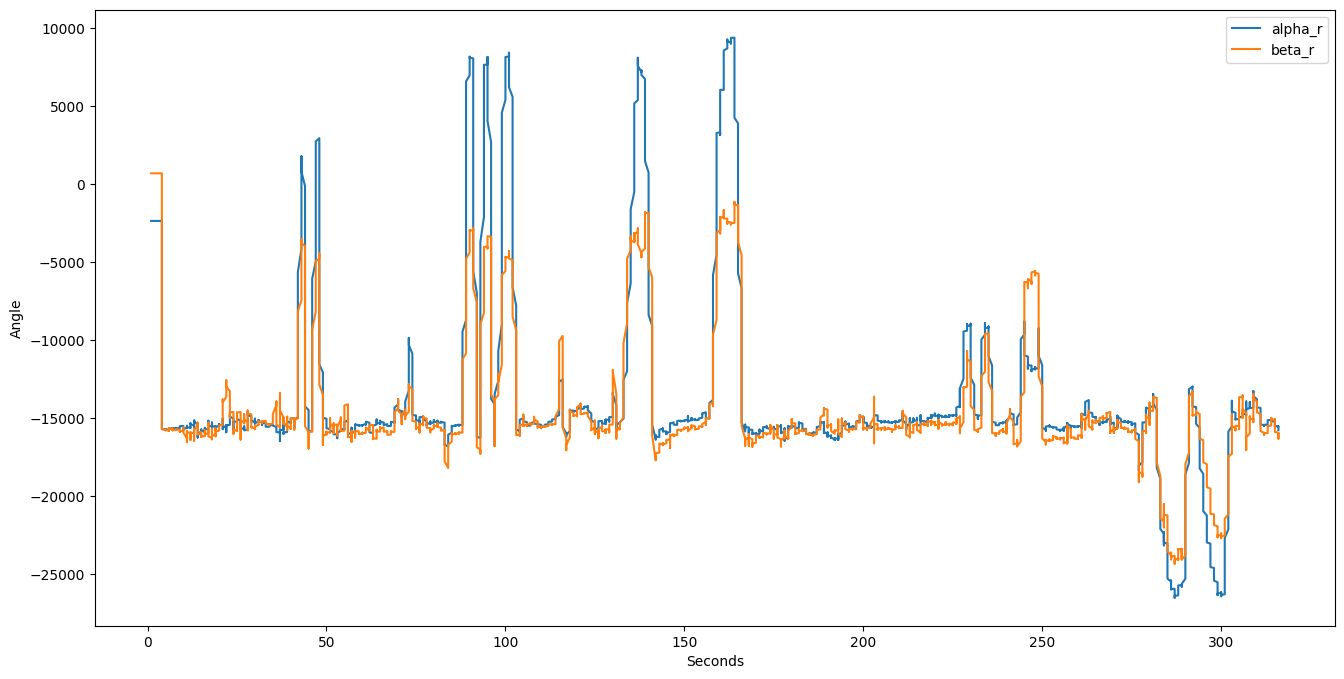

In [6]:
plt.figure(figsize=(16, 8))

plt.plot(df_analysis['seconds'], df_analysis['alpha_r'], label='alpha_r')
plt.plot(df_analysis['seconds'], df_analysis['beta_r'], label='beta_r')
#plt.plot(df_analysis['seconds'], df_analysis['ab_r_diff'], label='difference')
plt.xlabel('Seconds')
plt.ylabel('Angle')
plt.legend()
plt.show()

In [6]:
acc_x_n = df_analysis['acc_x_n'].to_frame()
acc_x_n['sma'] = acc_x_n['acc_x_n'].rolling(25).mean()
acc_x_n['cma'] = acc_x_n['acc_x_n'].expanding().mean()
acc_x_n['ema'] = acc_x_n['acc_x_n'].ewm(span=25).mean()
#acc_x_n.dropna(inplace=True)

In [7]:
acc_y_n = df_analysis['acc_y_n'].to_frame()
acc_y_n['sma'] = acc_y_n['acc_y_n'].rolling(25).mean()
acc_y_n['cma'] = acc_y_n['acc_y_n'].expanding().mean()
acc_y_n['ema'] = acc_y_n['acc_y_n'].ewm(span=25).mean()
#acc_x_n.dropna(inplace=True)

In [8]:
acc_z_n = df_analysis['acc_z_n'].to_frame()
acc_z_n['sma'] = acc_z_n['acc_z_n'].rolling(25).mean()
acc_z_n['cma'] = acc_z_n['acc_z_n'].expanding().mean()
acc_z_n['ema'] = acc_z_n['acc_z_n'].ewm(span=25).mean()
#acc_x_n.dropna(inplace=True)